In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from scipy import *
from scipy import optimize

from wavefunction1d import *


from matplotlib.gridspec import GridSpec,  GridSpecFromSubplotSpec

from Ejcos import *

<IPython.core.display.Javascript object>


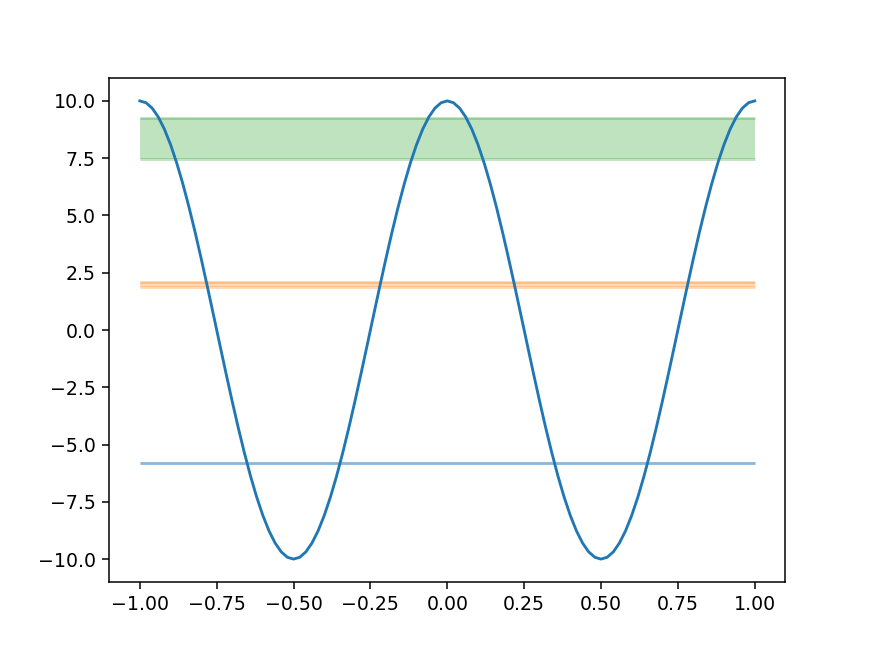

In [3]:
plot_Ejcos(Ej = 10, Ec = 1, N = 3)

<IPython.core.display.Javascript object>


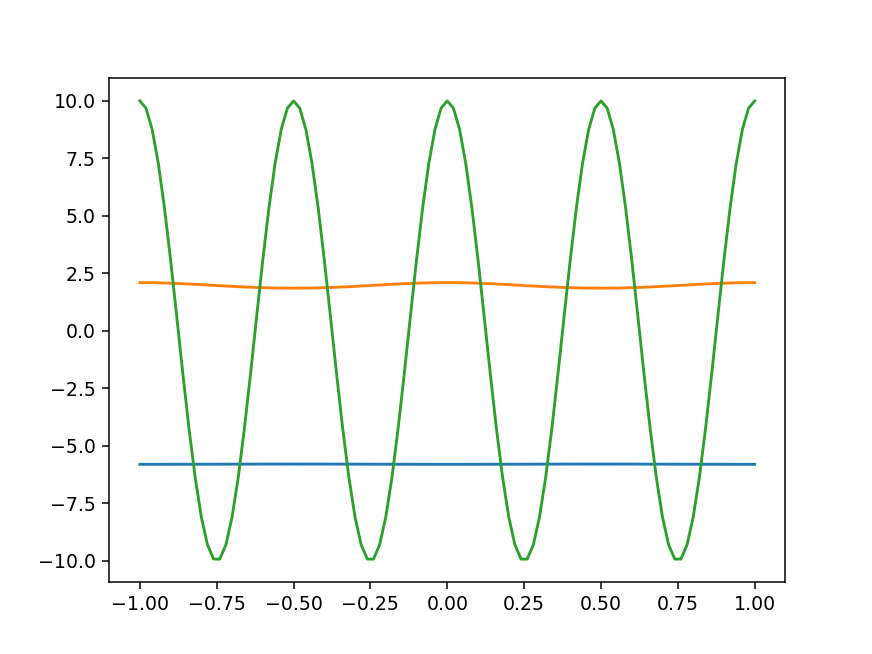

In [43]:
ng_list = np.linspace(-1, 1, 101)

Ej = 10
Ec = 1

Es = get_CPB_spec(Ej = Ej, Ec = Ec, ng_list = ng_list)

fig, ax = plt.subplots()

ax.plot(ng_list, Es[:,0])
ax.plot(ng_list, Es[:,1])

ax.plot(ng_list, Ej*np.cos(ng_list*4*np.pi))


In [ ]:


plt.rc('text', usetex=True)
plt.rc('font', family='serif')




EjEc = [[1,5], [1,0.45] ]


    
Ec = 1
Ej = 5
El = 0


Band = 1

NQ = 3

Nng = 601

Q = np.arange(-NQ, NQ +1)

Q_mtx = np.diag( np.ones( len(Q) ) )

J_mtx = np.diag( np.ones(2*NQ) , 1) + np.diag( np.ones(2*NQ) , -1)

L_mtx = np.diag( 2*np.ones( len(Q) ) ) - np.diag( np.ones(2*NQ) , 1) - np.diag( np.ones(2*NQ) , -1)

Nfi = 301
fi_lim = 3*2*np.pi

fi = np.linspace(-fi_lim, fi_lim, Nfi)


ng_lim = 1.5

ng_list = np.linspace(.4, .85, Nng)

Es = []
Psis = []

for param in EjEc:
    Ej, Ec = param
    
    E = np.zeros( (Nng, 2*NQ+1))
    ##               (ng,  band,    charge/phase)
    Psi = np.zeros( (Nng, 2*NQ+1, 2*NQ+1) )
    Psi_fi = np.zeros( (Nng, 2*NQ+1 , Nfi ) )

    for i, ng in enumerate(ng_list):
    
        H = 4*Ec*(Q - ng)**2 * Q_mtx - Ej * J_mtx + El*L_mtx
    
        evals, evecs = solve_eigenproblem(H)
    
        E[i] = evals
        Psi[i] =  evecs
    
    #    for j in np.arange(2*NQ +1):
    #        for k, fk in enumerate(fi): 
    #            Psi_fi[i][j][k] = abs (np.sum( Psi[i][j] * np.exp(1j*(Q-ng) * fk )  ) )**2
    
        Psi_fi[i] = abs ( Psi[i].dot( np.exp(1j*np.outer(Q-ng, fi) )) )**2
    
    Es.append(E)
    Psis.append(Psi)
    
fig=plt.figure(figsize = (5,3.5))

gs0 = GridSpec(2, 1,height_ratios=[1.5, 1])

gs0.update( hspace = 0.2)

gs00 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[0], wspace = .25)

gs01 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1], wspace = .25)

gs11 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs01[0], wspace = .1)
gs21 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs01[1], wspace = .1)


#gs= GridSpec( 4, 2, width_ratios=[2, 1] )
#
#gs.update(hspace = .5, wspace = .2)

gss = [gs11, gs21]
cases = [0,1]


ax_Es = []

coefs = [[-1, -0.75, -1, -1],
         [1, -0.75,  -1*69/67, 1]]



axis = []

for case in cases:
    

    
#    gs.update( hspace = .2)

    
    E = Es[case]
    Psi = Psis [case]
    
    ax_E = fig.add_subplot(gs00[case])   
    
    ax_E.plot(ng_list, E[:,0], lw = 2, label = r'$|g \rangle$')
    ax_E.plot(ng_list, E[:,1], '--', lw = 2, label = r'$|e \rangle$')
    

